# imports

In [1]:
from os import listdir,mkdir,makedirs
from os.path import isfile, join, isdir,exists
import pandas as pd
import numpy as np
from scipy import stats
import re
import matplotlib.pyplot as plt
from matplotlib.backends.backend_pdf import PdfPages
from myplots import roundup, rounddown, find_decimal_fold, percentile_cut_off, rarefaction_calc, rarefaction_plot,draw_correlation_scatter
from matplotlib.ticker import FormatStrFormatter
import cPickle as pickle
from Bio.SeqUtils import GC
import seaborn as sns
import random
from scipy.stats import pearsonr,fisher_exact
from skbio.diversity.alpha import shannon, simpson, berger_parker_d

from pop_organize import get_sample_data, get_sample_with_dfs
from SufficientStatistics import *
from MyFunctionsShani import *
import math
from myplots import roundup, rounddown, find_decimal_fold
from skbio.stats.distance import mantel
from scipy.spatial.distance import braycurtis, pdist, euclidean


from GeneralFeaturePhenotypeInteractions.Feature_phenotype_functions import * 
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions import *
from TCR_microbiome_interactions.TCR_microbiome_interactions_functions2 import *
from SampleLists.SampleFileFunctions import *
from PhenotypicData.PhenotypeGenerationFunctions import *
from CardioProject.CardioFunctions import *
from PredictionPipeline.PredictionFunctions import *
from TCR_feature_generation.SubsamplingFunctions import *

import os
from Utils import cacheOnDisk
from SegalQueue.qp import qp,fakeqp
from addloglevels import sethandlers

#ML imports:
from xgboost import XGBClassifier
import lightgbm as lgb
from collections import OrderedDict
from sklearn.model_selection import GroupKFold,StratifiedKFold, KFold
import statsmodels.formula.api as sm
from sklearn.linear_model import LogisticRegression
import shap
from sklearn import metrics, preprocessing
from sklearn.svm import LinearSVC
from sklearn.feature_selection import SelectFromModel,SelectKBest,chi2,mutual_info_classif,f_classif
from sklearn.naive_bayes import GaussianNB

MyPath='/net/mraid08/export/genie/Lab/Personal/ShaniBAF'

done1
stop
stop
done1
stop
done
done
done
done
stop
stop
end of function!!!


/usr/wisdom/python/lib/python2.7/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters


end of function!!!


In [2]:
import time
cdate=str(time.strftime("%d%m%Y"))
cdate

'06102018'

# analyse cardio phenotype file and save: *updated 150918

In [ ]:
f2='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx' %MyPath
origData=pd.read_excel(f2)

df=pd.DataFrame()
for n,col in enumerate(origData.columns):
    nans=len(origData[origData[col].isnull()])
    n9999=len(origData[origData[col]==9999])
    nCategs=len(origData[col].value_counts())
#     print col,nans,n9999,nCategs
    df.loc[n,'number of Nans']=nans
    df.loc[n,'number of 9999s']=n9999
    df.loc[n,'number of categories']=nCategs
    df.loc[n,'columns']=col
df['total nans']=df['number of Nans']+df['number of 9999s']
df['Type']=df['number of categories'].apply(lambda x: 'constant' if x<2 else ('binary' if x==2 else ('categorial' if (x>2)&\
(x<6) else 'Continuous')))

f3='%s/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies_ANALYSIS.xlsx' %MyPath
df.to_excel(f3)

    


In [ ]:
#INTERESTING COLUMNS (BINARY/CONTINUOUS, WITH MAXIMUM 34 MISSING VALUES)
binaryPhens=['Hypertension','Dyslipidemia','Microvascular Complications']
continuousPhens=['LDL','HDL','Triglycerides','CRP','HbA1C','PLT','Hemoglobin',
'Initial CPK','Maximal CPK','LDH','AST','Glucose']

# check phenotype association with TCRdf:

## full dataset

In [ ]:
ss=None
repeat=None
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False. 


testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

## ss12500rep1

In [ ]:
ss=12500
repeat=1
ssPNP=False #True/False. subsample only if not exist
ssCardio=False #True/False. subsample only if not exist
genTCRdfPNP=False #True/False. 
genTCRdfCardio=False #True/False.

testPhenotypeAffectsOnsubsampledCohorts(ss,repeat,ssPNP,ssCardio,genTCRdfPNP,genTCRdfCardio)

# analyze 'Known CAD' phenotype:

## compare phenotypes and TCR features between Dphenotype groups:

### define function:

the function compareGroups_DphenotypeBinary was copied to CardioFunctions.py

### run for 'Known CAD'

number of categories is 2
Known CAD_0
[u'BD950', u'BD951', u'BD952', u'BD953', u'BD955', u'BD957', u'BD959', u'BD961', u'BD962', u'BD964', u'BD965', u'BD967', u'BD969', u'BD970', u'BD971', u'BD973', u'BD974', u'BD976', u'BD977', u'BD978', u'BD979', u'BD980', u'BD981', u'BD982', u'BD983', u'BD984', u'BD985', u'BD989', u'BD990', u'BD992', u'BD995', u'BD997', u'BD998', u'BD999', u'BD1001', u'BD1002', u'BD1003', u'BD1005', u'BD1006', u'BD1008', u'BD1009', u'BD1011', u'BD1015', u'BD1019', u'BD1026', u'BD1029', u'BD1031', u'BD1033', u'BD1034', u'BD1035', u'BD1036', u'BD1042', u'BD1045', u'BD1048', u'BD1050', u'BD1051', u'BD1052', u'BD1053', u'BD1054', u'BD1056', u'BD1061', u'BD1064', u'BD1065', u'BD1066', u'BD1067', u'BD1068', u'BD1069', u'BD1072', u'BD1074', u'BD1075', u'BD1076', u'BD1077', u'BD1078', u'BD1081', u'BD1082', u'BD1083', u'BD1086', u'BD1087', u'BD1090', u'BD1092', u'BD1093', u'BD1094', u'BD1095', u'BD1099']
84
Known CAD_1
[u'BD956', u'BD958', u'BD960', u'BD963', u'BD968', u'BD9

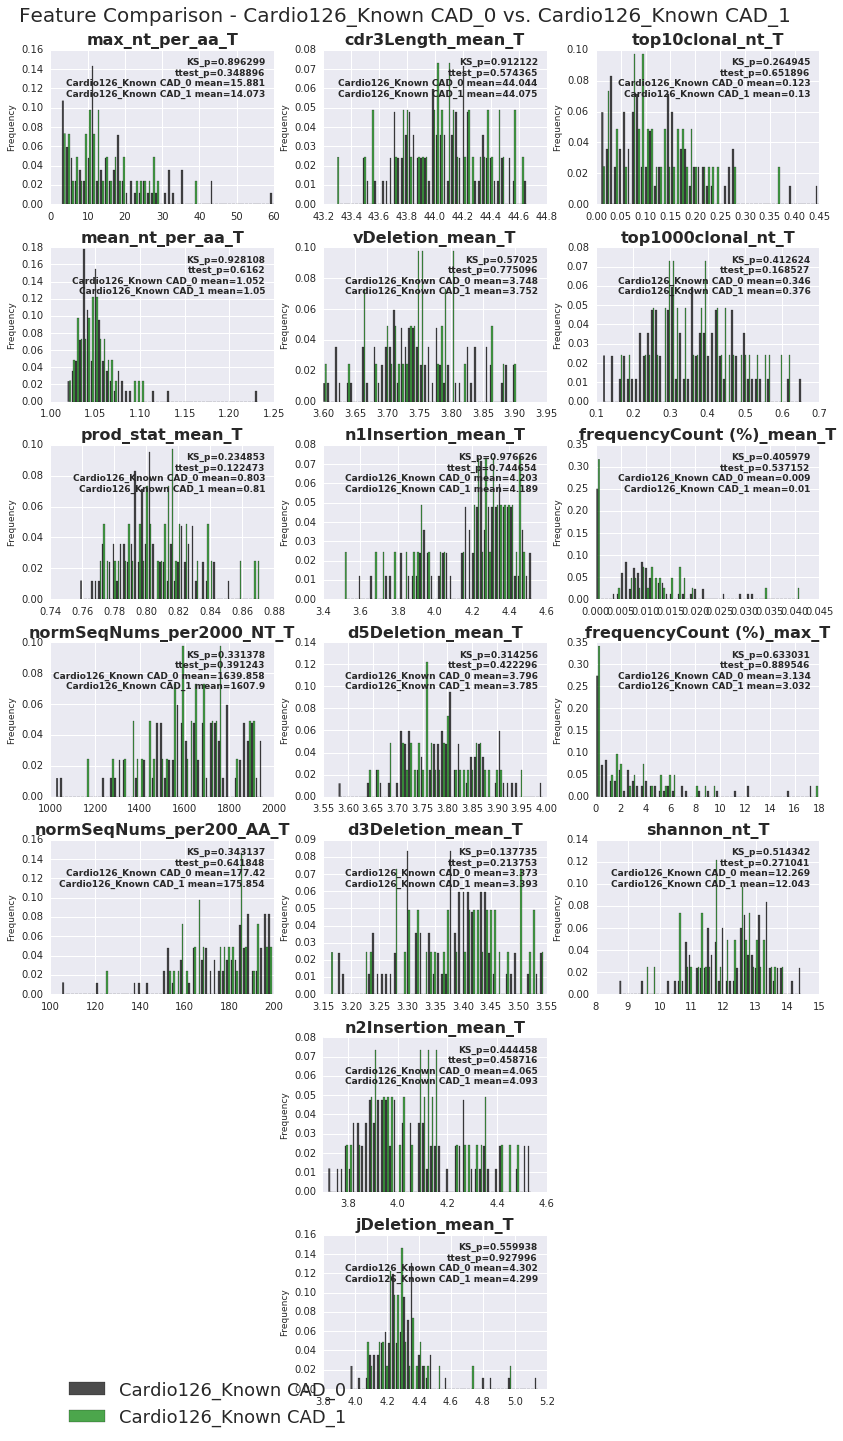

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
filtering cohort1 to include 84 samples
filtering cohort2 to include 41 samples
plotting gene usage comparison...
plot file can be found in -realAnalysis folder


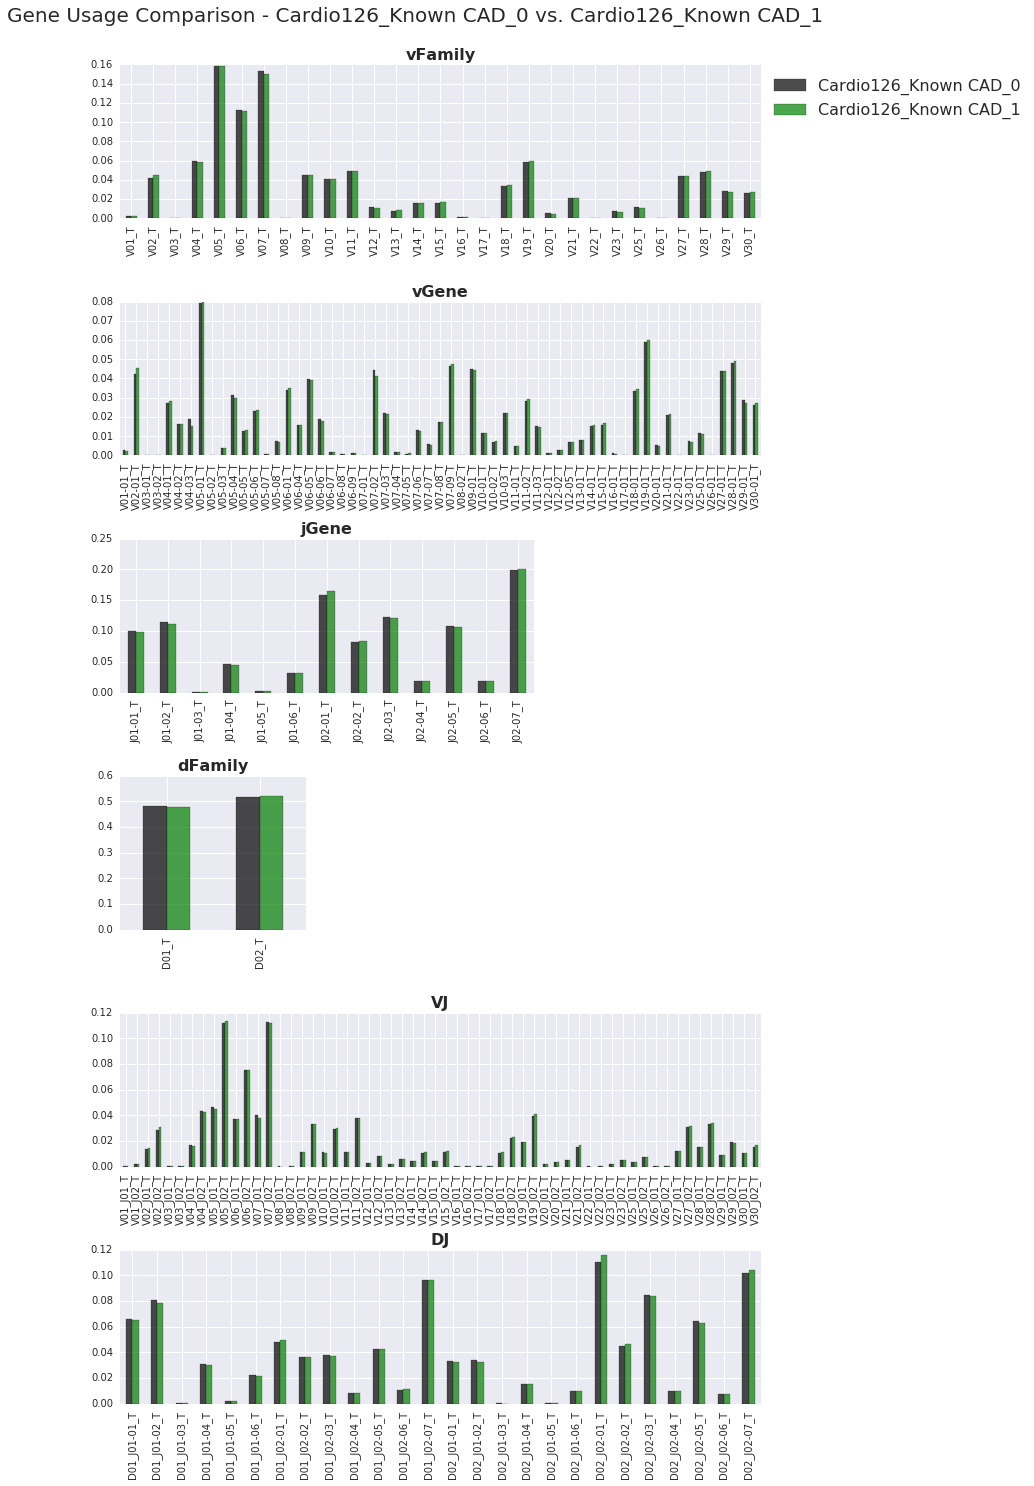

0 Age
1 BMI
2 eGFR by CKD-EPI
3 WBC
4 LDL
5 HDL
6 Triglycerides
7 CRP
8 HbA1C
9 PLT
10 Hemoglobin
11 Initial CPK
12 Maximal CPK
13 LDH
14 AST
15 Glucose
16 Initial Troponin
17 Maximal Troponin
0 Gender
1 Smoking Status
2 Hypertension
3 Dyslipidemia
4 Microvascular Complications
5 Glucose Disorder
6 Previous CABG
7 PreviousPCImapped
8 Admission Diagnosis
9 LVEF
10 Known CAD


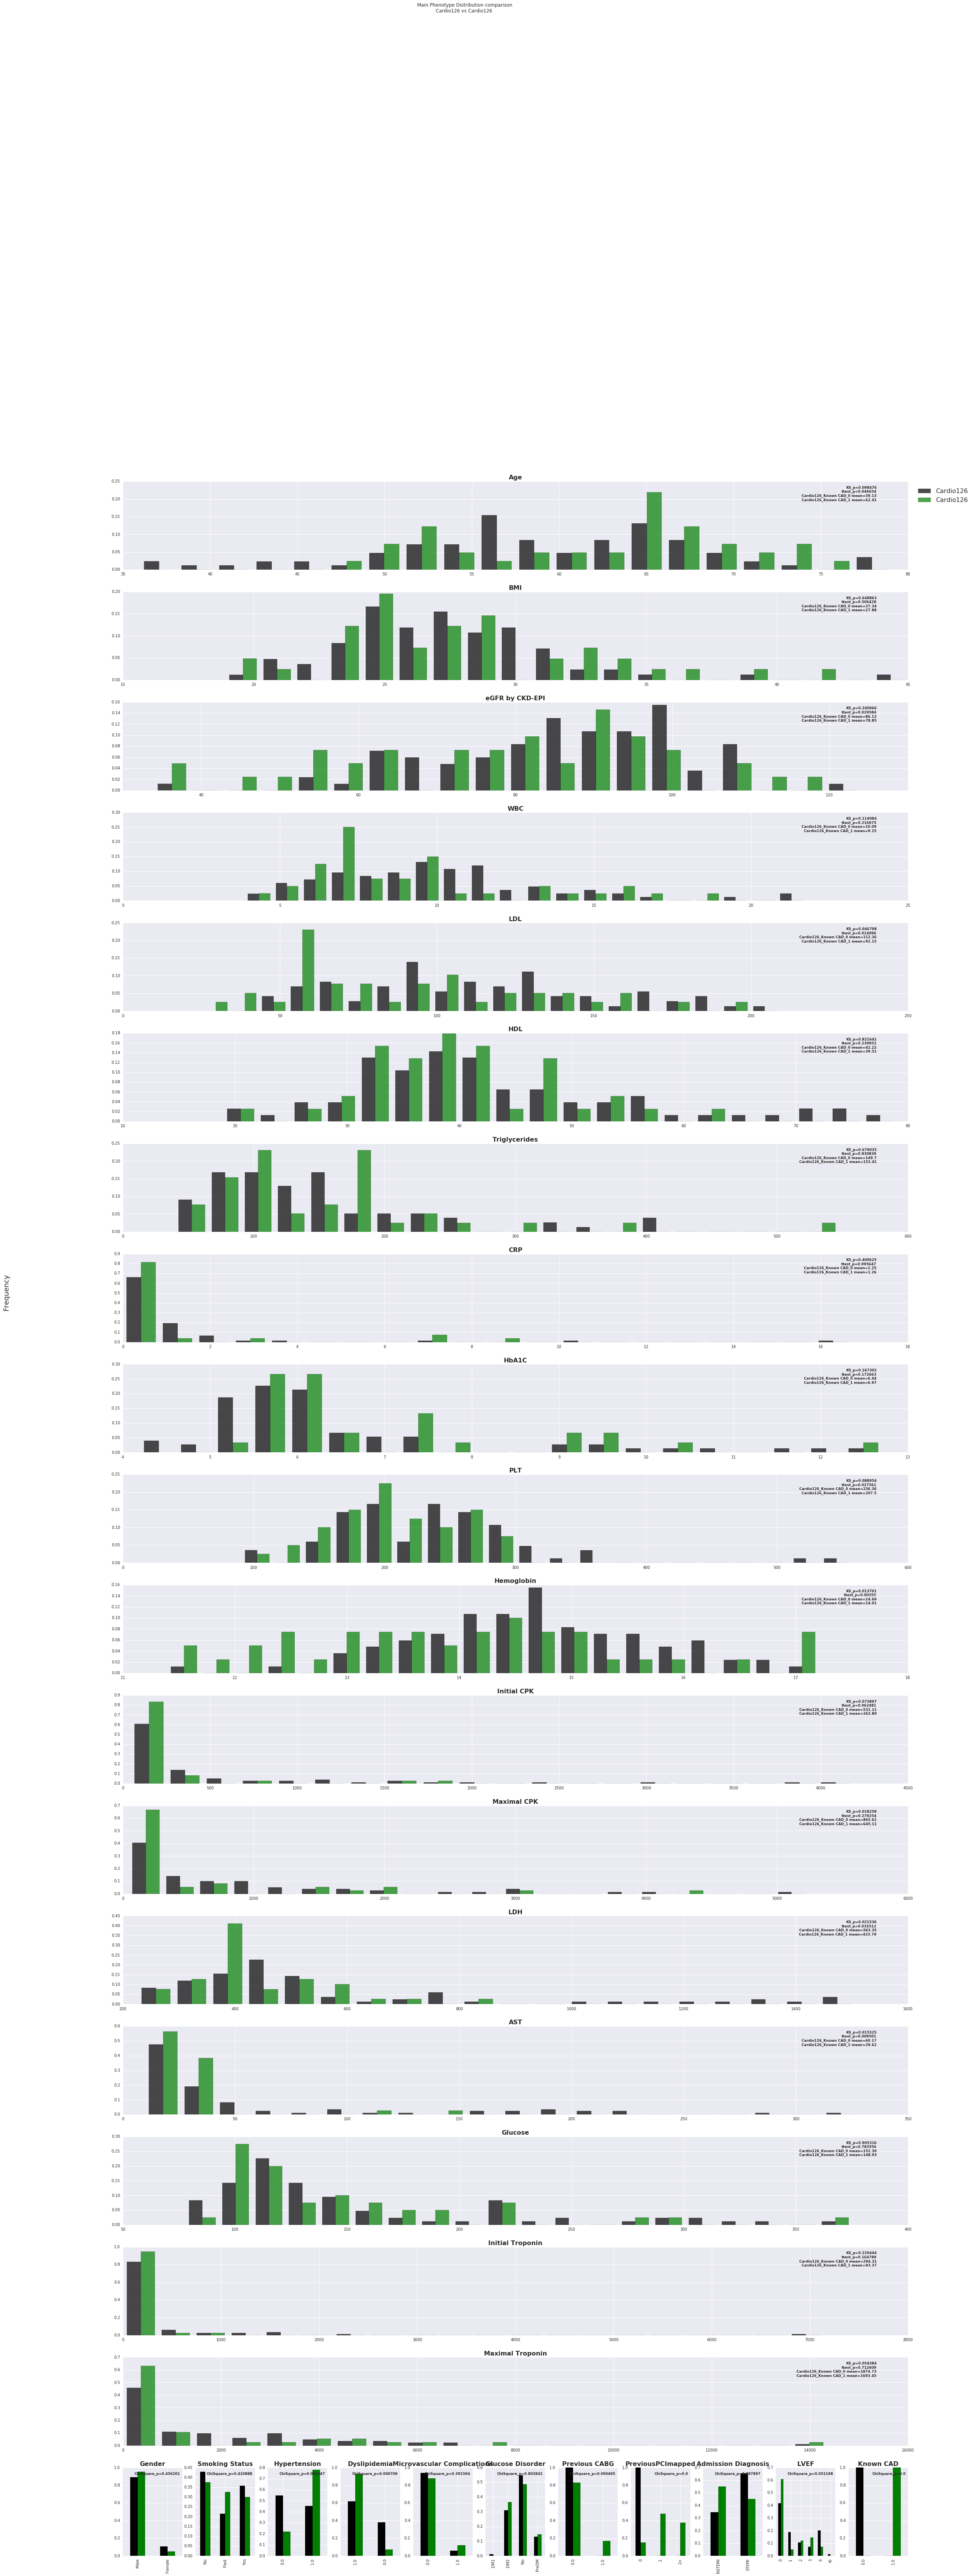

figure was saved in folder TCR_real_data/realAnalysis
done
end of function!!!


In [12]:
Dphenotype='Known CAD'
ss=None
repeat=None
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx'
Cardio126_phen_new_dummies=pd.read_excel(f1)
phenotypeDF=Cardio126_phen_new_dummies

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes,phenotypeDF=phenotypeDF)



##### run for 'Known CAD' and ss5000rep3

number of categories is 2
Known CAD_0
[u'BD1053', u'BD983', u'BD965', u'BD1034', u'BD1095', u'BD952', u'BD1054', u'BD1003', u'BD1074', u'BD1092', u'BD1064', u'BD984', u'BD1082', u'BD962', u'BD1033', u'BD964', u'BD982', u'BD1035', u'BD974', u'BD1094', u'BD992', u'BD1072', u'BD1042', u'BD1015', u'BD1052', u'BD1005', u'BD1093', u'BD973', u'BD1075', u'BD995', u'BD1083', u'BD985', u'BD1065', u'BD1002', u'BD1045', u'BD1001', u'BD1056', u'BD950', u'BD1011', u'BD1090', u'BD970', u'BD1076', u'BD999', u'BD1031', u'BD1069', u'BD989', u'BD1066', u'BD1019', u'BD1006', u'BD1009', u'BD1051', u'BD1036', u'BD1087', u'BD967', u'BD1061', u'BD981', u'BD1026', u'BD977', u'BD978', u'BD997', u'BD1078', u'BD998', u'BD1077', u'BD971', u'BD1067', u'BD1068', u'BD1081', u'BD961', u'BD951', u'BD1048', u'BD980', u'BD1086', u'BD969', u'BD990', u'BD979', u'BD976', u'BD1099', u'BD1008', u'BD959', u'BD1050']
80
Known CAD_1
[u'BD1004', u'BD1063', u'BD1073', u'BD993', u'BD1013', u'BD1084', u'BD1062', u'BD963', u'BD1032',

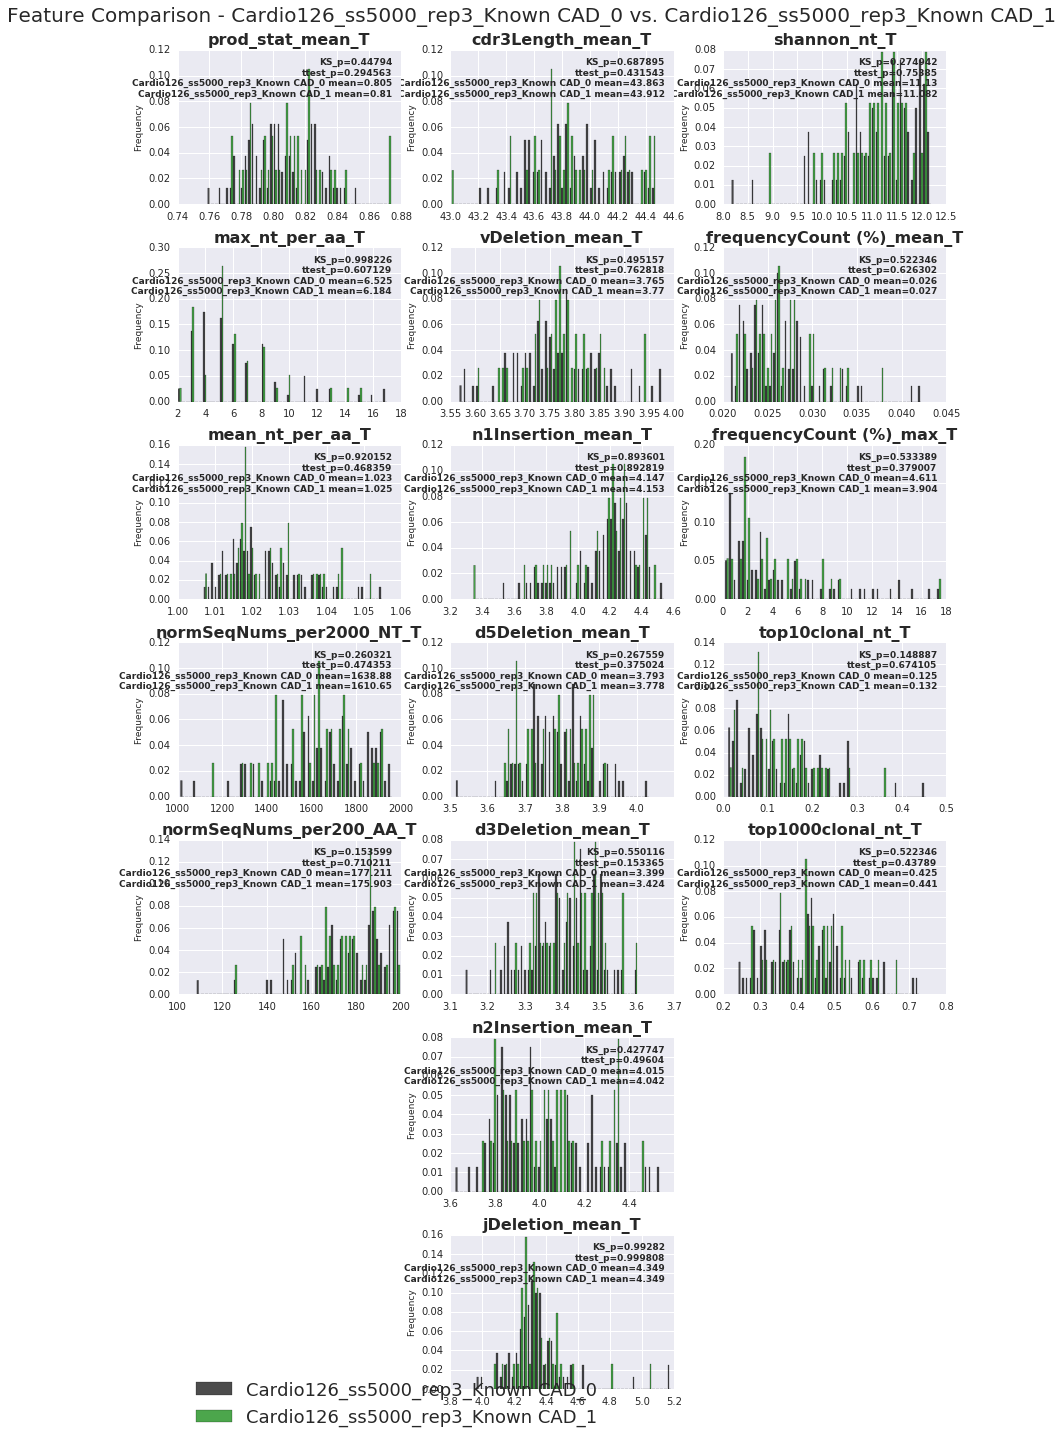

generating excel file with mean values for compared dataset (find in -featureSummaryDFs folder-)
filtering cohort1 to include 80 samples
filtering cohort2 to include 38 samples
plotting gene usage comparison...
plot file can be found in -realAnalysis folder


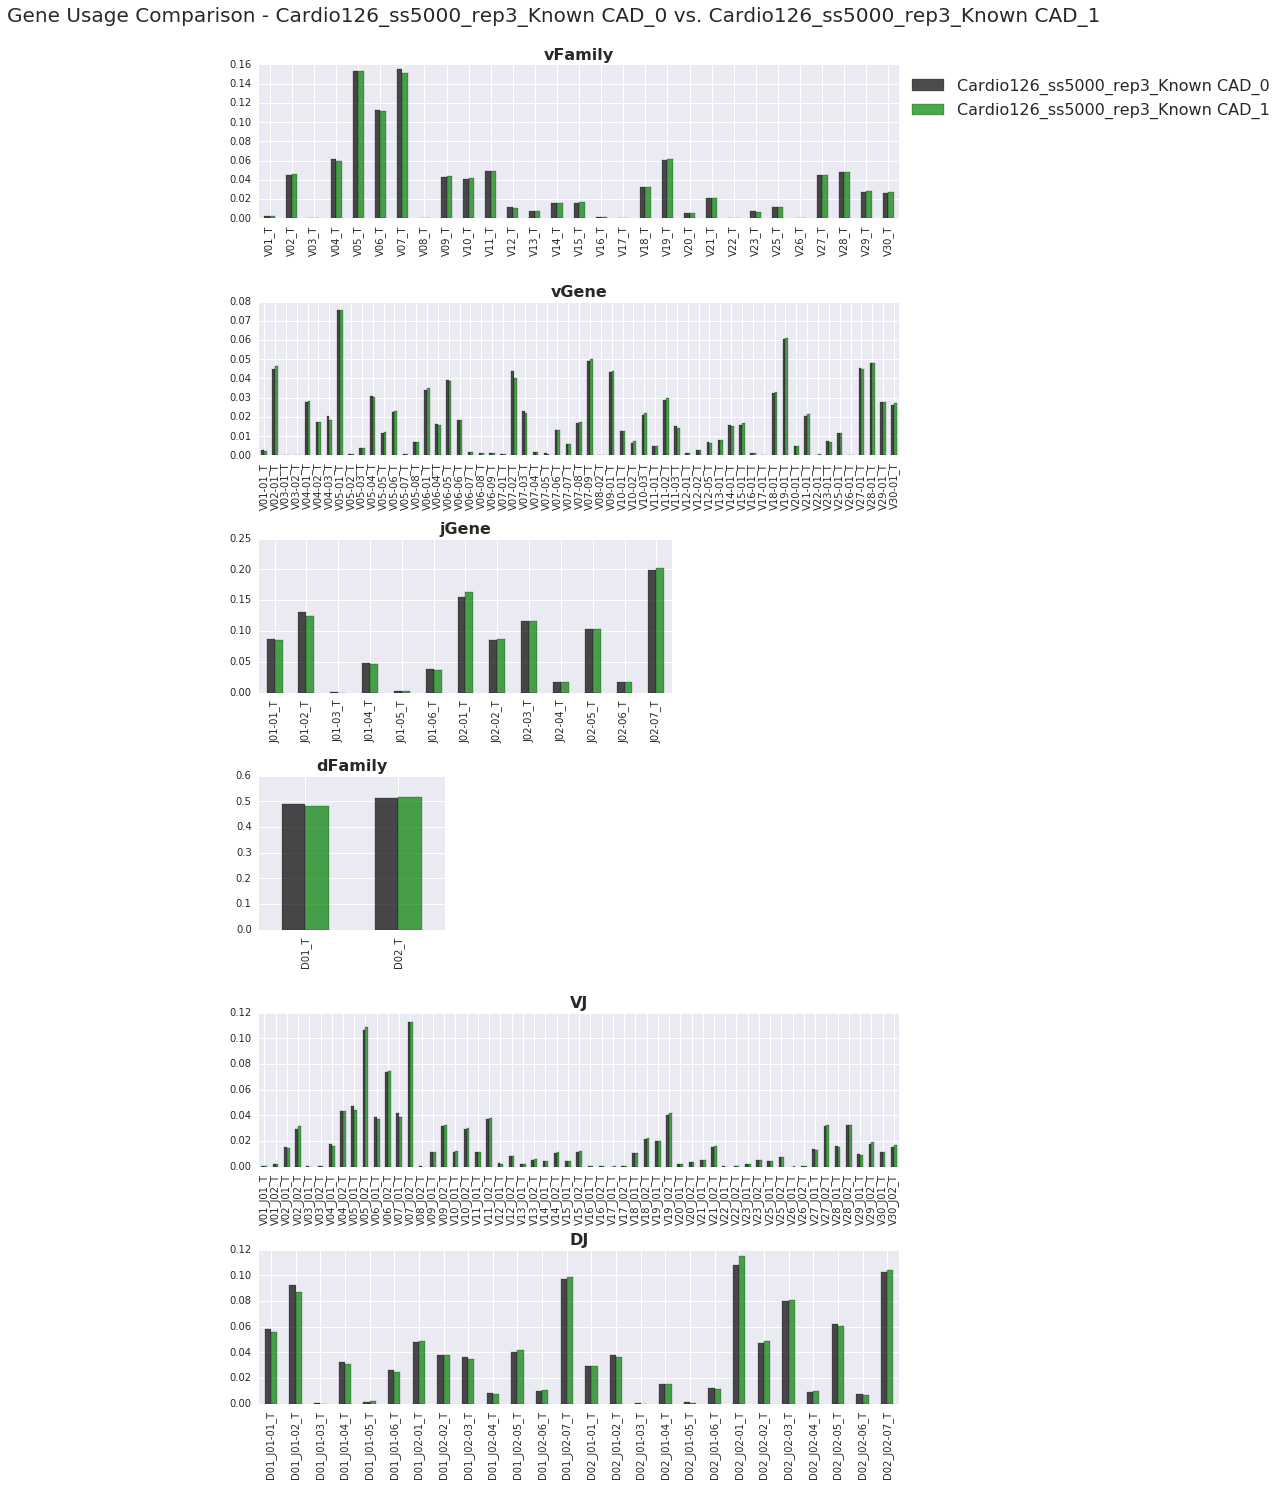

0 Age
1 BMI
2 eGFR by CKD-EPI
3 WBC
4 LDL
5 HDL
6 Triglycerides
7 CRP
8 HbA1C
9 PLT
10 Hemoglobin
11 Initial CPK
12 Maximal CPK
13 LDH
14 AST
15 Glucose
16 Initial Troponin
17 Maximal Troponin
0 Gender
1 Smoking Status
2 Hypertension
3 Dyslipidemia
4 Microvascular Complications
5 Glucose Disorder
6 Previous CABG
7 PreviousPCImapped
8 Admission Diagnosis
9 LVEF
10 Known CAD


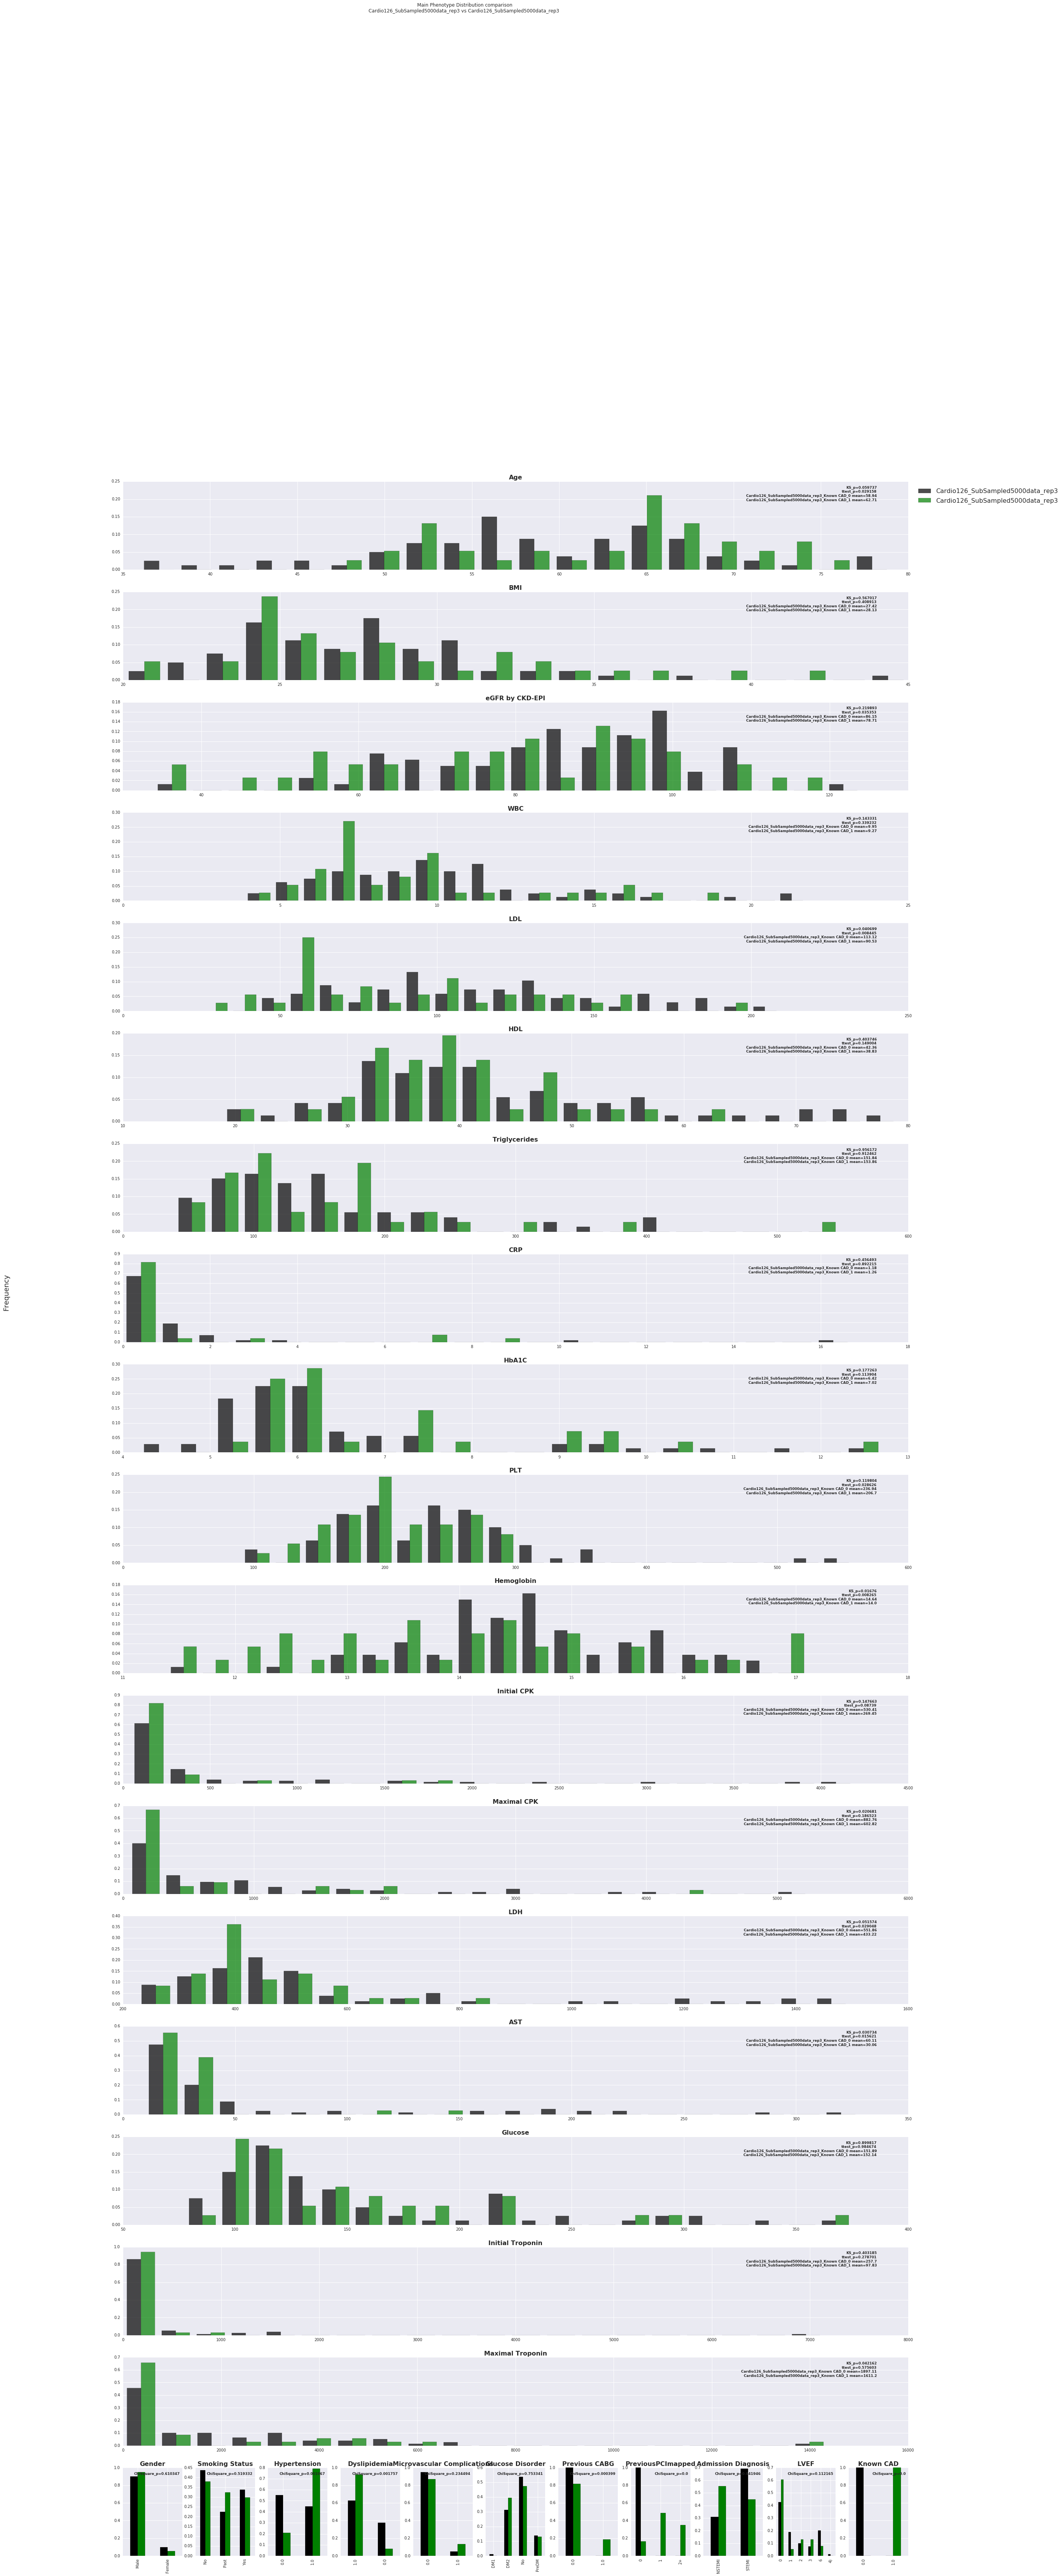

figure was saved in folder TCR_real_data/realAnalysis
done
end of function!!!


In [11]:
Dphenotype='Known CAD'
ss=5000
repeat=3
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126ss5000rep3_phen_new_dummies.xlsx'
Cardio126_phen_new_dummies=pd.read_excel(f1)
phenotypeDF=Cardio126_phen_new_dummies

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes,ss=ss,repeat=repeat,phenotypeDF=phenotypeDF)



## generate seperate TCRdfs for each Dphenotype group:

In [ ]:
the function genTCRdfForDphenotypeGroup was copied to CardioFunctions.py

### run for 'Known CAD'

number of categories is 2
Known CAD_0
[u'BD950', u'BD951', u'BD952', u'BD953', u'BD955', u'BD957', u'BD959', u'BD961', u'BD962', u'BD964', u'BD965', u'BD967', u'BD969', u'BD970', u'BD971', u'BD973', u'BD974', u'BD976', u'BD977', u'BD978', u'BD979', u'BD980', u'BD981', u'BD982', u'BD983', u'BD984', u'BD985', u'BD989', u'BD990', u'BD992', u'BD995', u'BD997', u'BD998', u'BD999', u'BD1001', u'BD1002', u'BD1003', u'BD1005', u'BD1006', u'BD1008', u'BD1009', u'BD1011', u'BD1015', u'BD1019', u'BD1026', u'BD1029', u'BD1031', u'BD1033', u'BD1034', u'BD1035', u'BD1036', u'BD1042', u'BD1045', u'BD1048', u'BD1050', u'BD1051', u'BD1052', u'BD1053', u'BD1054', u'BD1056', u'BD1061', u'BD1064', u'BD1065', u'BD1066', u'BD1067', u'BD1068', u'BD1069', u'BD1072', u'BD1074', u'BD1075', u'BD1076', u'BD1077', u'BD1078', u'BD1081', u'BD1082', u'BD1083', u'BD1086', u'BD1087', u'BD1090', u'BD1092', u'BD1093', u'BD1094', u'BD1095', u'BD1099']
84
preparing sharing Matrix
only samples included in Known CAD_0 sample

/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (10,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


4 BD1082.tsv
5 BD1054.tsv
6 BD1026.tsv
7 BD998.tsv
8 BD989.tsv
9 BD1094.tsv
10 BD1045.tsv
11 BD980.tsv
12 BD951.tsv
13 BD1093.tsv
14 BD1042.tsv
15 BD1077.tsv
16 BD964.tsv
17 BD1002.tsv
18 BD1005.tsv
19 BD999.tsv
20 BD990.tsv
21 BD1029.tsv
22 BD997.tsv
23 BD1052.tsv


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (10) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


24 BD1083.tsv
25 BD973.tsv
26 BD1067.tsv
27 BD974.tsv
28 BD1015.tsv
29 BD1069.tsv
30 BD1078.tsv
31 BD1003.tsv
32 BD965.tsv


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (10,12,25) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


33 BD1076.tsv
34 BD962.tsv
35 BD1092.tsv
36 BD957.tsv
37 BD1095.tsv
38 BD981.tsv
39 BD950.tsv
40 BD1036.tsv
41 BD1031.tsv


/usr/wisdom/python/lib/python2.7/site-packages/ipykernel_launcher.py:9: DtypeWarning: Columns (25) have mixed types. Specify dtype option on import or set low_memory=False.
  if __name__ == '__main__':


42 BD959.tsv
43 BD1009.tsv
44 BD1075.tsv
45 BD961.tsv
46 BD1072.tsv
47 BD982.tsv
48 BD953.tsv
49 BD985.tsv
50 BD1035.tsv
51 BD1051.tsv
52 BD1056.tsv
53 BD1087.tsv
54 BD977.tsv
55 BD970.tsv
56 BD1064.tsv
57 BD979.tsv
58 BD1011.tsv
59 BD1099.tsv
60 BD1048.tsv
61 BD1034.tsv
62 BD1033.tsv
63 BD1090.tsv
64 BD984.tsv
65 BD955.tsv
66 BD983.tsv
67 BD952.tsv
68 BD967.tsv
69 BD1008.tsv
70 BD1074.tsv
71 BD1006.tsv
72 BD969.tsv
73 BD1001.tsv
74 BD978.tsv
75 BD1019.tsv
76 BD971.tsv
77 BD1065.tsv
78 BD976.tsv
79 BD992.tsv
80 BD1086.tsv
81 BD995.tsv
82 BD1050.tsv
83 BD1081.tsv
generating a df with all sequences and number of samples shared...
number of dfs in directory: 84
the length of df list is 84
                 frequencyCount (%)  prod_stat      Sample
aminoAcid                                                 
*GALD*REVRDEQFF            0.005753          0  BD1064.tsv
CA*ATDNYGYTF               0.011506          0  BD1064.tsv
CA*HQFAAQETQYF             0.011505          0  BD1064.tsv
CA*Q*SGTDT

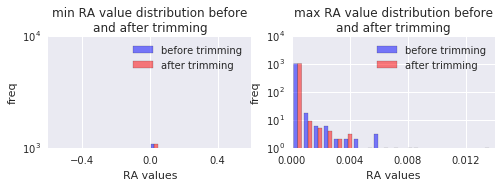

binarizing df...
existing values in df are now:
[0. 1.]
values contain zeros, log transformation was not applied
final file name is:
/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/Known CAD_0_sharingAnalysis/sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed
plotting mean sample distributions for all generated dfs...
0 (84, 38790)
1 (84, 1071)
2 (84, 1071)


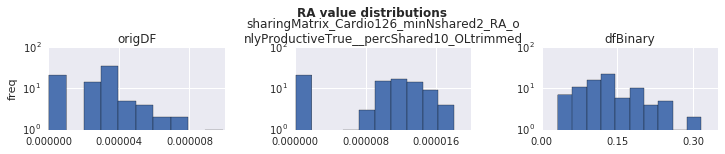

plotting RA value distributions for all generated dfs IN A RANDOM SAMPLE


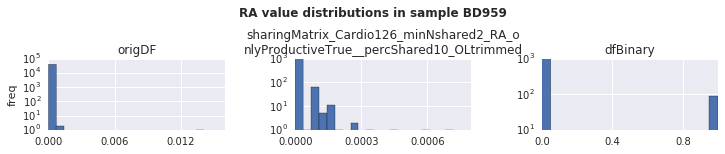

saving df to file...
saving binary df to file
ALL is done!!!
Known CAD_1
[u'BD956', u'BD958', u'BD960', u'BD963', u'BD968', u'BD986', u'BD987', u'BD991', u'BD993', u'BD996', u'BD1000', u'BD1004', u'BD1007', u'BD1010', u'BD1012', u'BD1013', u'BD1014', u'BD1016', u'BD1017', u'BD1018', u'BD1020', u'BD1021', u'BD1028', u'BD1030', u'BD1032', u'BD1037', u'BD1047', u'BD1049', u'BD1058', u'BD1060', u'BD1062', u'BD1063', u'BD1070', u'BD1071', u'BD1073', u'BD1079', u'BD1084', u'BD1088', u'BD1089', u'BD1096', u'BD1097']
41
preparing sharing Matrix
only samples included in Known CAD_1 sample list are included in the analysis
getting all samples from the sampleList...
extracting unique aa sequenecs from all samples...(n=41)
0 BD1014.tsv
1 BD1013.tsv
2 BD996.tsv
3 BD991.tsv
4 BD1028.tsv
5 BD1021.tsv
6 BD1030.tsv
7 BD958.tsv
8 BD1037.tsv
9 BD987.tsv
10 BD956.tsv
11 BD963.tsv
12 BD1070.tsv
13 BD1079.tsv
14 BD1020.tsv
15 BD1084.tsv
16 BD1060.tsv
17 BD1012.tsv
18 BD1004.tsv
19 BD1071.tsv
20 BD986.tsv
21

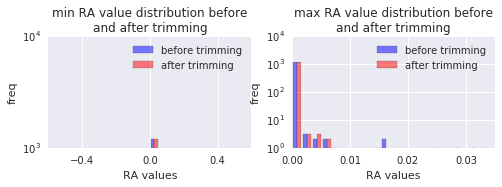

binarizing df...
existing values in df are now:
[0. 1.]
values contain zeros, log transformation was not applied
final file name is:
/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/Known CAD_1_sharingAnalysis/sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed
plotting mean sample distributions for all generated dfs...
0 (41, 11364)
1 (41, 1192)
2 (41, 1192)


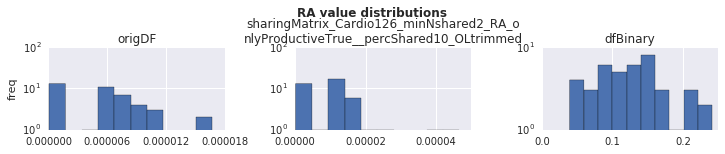

plotting RA value distributions for all generated dfs IN A RANDOM SAMPLE


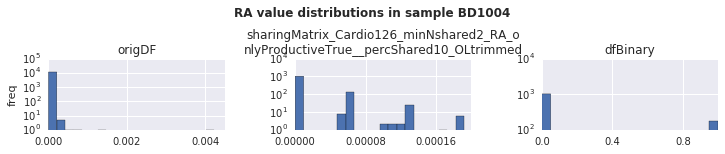

saving df to file...
saving binary df to file
ALL is done!!!


In [13]:
Dphenotype='Known CAD'
ssCardio=False
percShared=10

f1='/net/mraid08/export/genie/Lab/Personal/ShaniBAF/TCR_real_data/CardioSamples/phenotypicData/Cardio126phenAllInfo_withDummies.xlsx'
Cardio126_phen_new_dummies=pd.read_excel(f1)
phenotypeDF=Cardio126_phen_new_dummies

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared,phenotypeDF=phenotypeDF)

### run for 'Known CAD' and ss5000rep3

In [ ]:
Dphenotype='Known CAD'
ssCardio=False
percShared=10
ss=5000
repeat=3

phenotypeDF

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared,ss=ss,repeat=repeat,phenotypeDF=phenotypeDF)

## compare public sequences in Dphenotype:

In [ ]:
datasetName1='Cardio126'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data/CardioSamples' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
sampleListName1='Known CAD_0'
sampleListName2='Known CAD_1'
TCRdfPercShared1=5
TCRdfPercShared2=5
identityColumnForPie='Epitopespecies_VDJDB' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,sampleListName1),
             (datasetName2, datasetFolder2,TCRdfPercShared2,sampleListName2)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

## predictions:

### Generate TCRfeatureDF without completely correlated columns:

In [ ]:
filterFeaturesByCorr=1

ss=None
repeat=None
genFeatureDF=True
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=Cardio126
sampleListName='Cardio126'
print len(sampleList)


TCRfeatureDF3=removeRedundantFeatures(ss,repeat,filterFeaturesByCorr,sampleList,sampleListName,genFeatureDF)
 

In [ ]:
#process feature df:
corrThreshold=1
featureDFfile='%s/TCR_real_data/PNP530Cardio126Combined/MatchedSamples/ss%srep%s/featureSummaryDFs\
/MatchedSamples_ss%srep%s_MatchedSamples_ss%srep%s_allFeatures' %(MyPath,ss,repeat,ss,repeat,ss,repeat)
featureDF=pd.read_pickle(featureDFfile)
featureDF,featureDFnameAddition=process_featureDF(featureDF,corrThreshold)

### get DFs:

In [ ]:
# ss=12500
# repeat=1
datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
datasetName='Cardio126' 
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=Cardio126
sampleList=editSampleNamesList(sampleList)
sampleListName='Cardio126'
percShared=10
print datasetName


# phenotype df:
f3='%s/phenotypicData/Cardio126_phen_new_dummies_extended.xlsx' %datasetFolder
phenotypeDF=pd.read_excel(f3).set_index('BD')
print 'phenotypeDF shape is %s_%s' %(phenotypeDF.shape[0],phenotypeDF.shape[1])
print phenotypeDF.iloc[:4,:4]

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/sharingAnalysis' %datasetFolder
TCRdfName='sharingMatrix_%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed_binary' %(datasetName,percShared)
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - without highly correlated columns...'
featureFilePickle2='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126%s_allFeatures_noCorrelated' %(MyPath,
                                                                                        '_filteredBy'+sampleListName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run predictions:

In [ ]:
Dphenotype='Known CAD'

###consider changing: n_splits, TCRdf,n_comp
featureComposition_list=['phenotypesOnly','phenotypes&PCA&TCRfeatures','phenotypes&TCRdf&PCA&TCRfeatures']
for featureComposition in featureComposition_list:
    XName='%s_%s' %(datasetName,featureComposition)
    if featureComposition=='phenotypesOnly':
        useTCRfeatures=False #True/False
        usePCAdf=False #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&TCRdf&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=True #True/False

    if featureComposition=='phenotypesOnly':
        kList=[10]
    else:        
#         kList=[10,25,50,70,100,120,150,170,200,250,300]
        kList=[5,7]


    for k in kList:
        modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                       (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                    (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.1, 'n_estimators': 1000,'max_depth': 3,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                     (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 1000,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                       (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                            (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 1000,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

        for n,modelAndParams in enumerate(modelAndParams_list):
                model=modelAndParams[0]
                modelName=modelAndParams[1]
                model_params=modelAndParams[2]
                
                if model==LogisticRegression:
                    featureSelectionMethod_list=[f_classif,'random']
                else:
                    featureSelectionMethod_list=[f_classif,'random','usingModel']
                if featureComposition=='phenotypesOnly':
                    featureSelectionMethod_list=[None]
                for featureSelectionMethod in featureSelectionMethod_list:

                    XName='%s_%s' %(datasetName,featureComposition)
                    
                    print '******featureComposition=%s, k=%s,modelAndParams=%s,featureSelectionMethod=%s********' %(featureComposition,
                                                            k,modelAndParams,featureSelectionMethod)

                    # (1) general definitions:
                    datasetType='Cardio' #PNP/PNP_Cardio

                    #(2) model definitions:
                    ResultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath
                    if not isdir(ResultFolder):
                        makedirs(ResultFolder)

                    n_splits=10
                    useCV=True
                    stratifiedCV=True

                    # (5) phenotypeDF:

                    genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
                    phenotypeDF=phenotypeDF
                    phenotypeDFname='cardioFull' #('small','allNum and more- see step #6.2

                    #(3) target definition:

                    targetDF=pd.DataFrame(phenotypeDF[Dphenotype])
        #             targetName=Dphenotype
                    targetDF=targetDF[targetDF[Dphenotype].notnull()]
                    YName=Dphenotype
                    print 'target value counts:'
                    print targetDF[Dphenotype].value_counts(dropna=False)

                    #  (4) feature composition:

                    ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
                    ## PCA- indicate n_comp and is Sparse, indicate feature selection
                    usePhenotype=True #True/False

                    # (6) TCRdf:
                    datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
                    datasetNameTCRdf='Cardio126'  
                    TCRdfName='sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
                    TCRdf=TCRdf

                    #(7) PCAdf (based on the TCRdf selected)
                    n_comp=100 # int or None 
                    isSparse=True #True/False

                    #(8) TCRfeatures:
                    getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
                    TCRfeatureDF=TCRfeatureDF2

                    sampleList=sampleList
                    sampleListName='Cardio126'

                    filterFeaturesByCorr=None #None or float between 0 and 1
                    featureSelectionUsingModel=False # True/False
            #                     C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            #                     filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
            #             k=150 #None (will be set to 50 / int - defines number of k best))
                    scale=True

                    predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,
                                          stratifiedCV, XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                          YName,targetDF,
                                          genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                          datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                          getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                          filterFeaturesByCorr,featureSelectionMethod,scale,
                                          k,cdate=cdate,overwriteResults=True)

print 'done with all iterations...'

### explore prediction results:

#### get results:

In [ ]:
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
YName='Known CAD'
for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/CardioSamples/Predictions2/%s_predictions/%s' %(MyPath,YName,modelName)
    df_folder='%s/predictionDFs' %folder
    results=concat_summarizing_dfs_excel(df_folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/resultSummary_%s.xlsx' %(folder,cdate)
    results.to_excel(f1)
    results.head(20)

#### plot results:

In [ ]:
plt.show()

In [ ]:
YName='Known CAD'
datasetName='Cardio126'

ss=None
repeat=None

# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.5,1)),('pr_auc_corrected',(0.2,0.6))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,ax1=plt.subplots(figsize=(16,9))
    #     
        print count
        count=count+1
        ss=None
        repeat=None
#         title='%s_%s_%s' %(YName,datasetName,featureSelectionMethod)
        title=''
        filterCrit=featureSelectionMethod
        ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                   xlim=(0,300),ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                  filterColumn=filterColumn,filterCrit=filterCrit,datasetName=datasetName,YName=YName)

        ax1.legend(fontsize=14,bbox_to_anchor=(-0.05, 1))

        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.35)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/%s_predictions' %(resultFolder,YName)
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'


    
    

# analyze 'PreviousPCI_binary ' phenotype:

## compare phenotypes and TCR features between Dphenotype groups:

### run for 'PreviousPCI_binary'

In [ ]:
PreviousPCI_binary

In [ ]:
Dphenotype='PreviousPCI_binary'
ss=None
repeat=None
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes)



### run for 'PreviousPCI_binary' and ss9000rep2

In [ ]:
Dphenotype='PreviousPCI_binary'
ss=9000
repeat=2
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes,ss=ss,repeat=repeat)



## generate seperate TCRdfs for each Dphenotype group:

In [ ]:
the function genTCRdfForDphenotypeGroup was copied to CardioFunctions.py

### run for 'PreviousPCI_binary'

In [ ]:
Dphenotype='PreviousPCI_binary'
ssCardio=False
percShared=5

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared)

### run for 'PreviousPCI_binary' and ss9000rep2

In [ ]:
Dphenotype='PreviousPCI_binary'
ssCardio=False
percShared=5
ss=9000
repeat=2

genTCRdfForDphenotypeGroup(Dphenotype,ssCardio,percShared,ss=ss,repeat=repeat)

## compare public sequences in Dphenotype:

In [ ]:
datasetName1='Cardio126'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data/CardioSamples' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
sampleListName1='PreviousPCI_binary_0'
sampleListName2='PreviousPCI_binary_1'
TCRdfPercShared1=5
TCRdfPercShared2=5
identityColumnForPie='Pathology_McPAS' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,sampleListName1),
             (datasetName2, datasetFolder2,TCRdfPercShared2,sampleListName2)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

In [ ]:
datasetName1='Cardio126'
datasetName2='Cardio126'
datasetFolder1='%s/TCR_real_data/CardioSamples' %MyPath
datasetFolder2='%s/TCR_real_data/CardioSamples' %MyPath
sampleListName1='PreviousPCI_binary_0'
sampleListName2='PreviousPCI_binary_1'
TCRdfPercShared1=None
TCRdfPercShared2=None
identityColumnForPie='Pathology_McPAS' #'Epitopespecies_VDJDB'/'Pathology_McPAS'
dropnaFromIdentitiesPie=True



datasetList=[(datasetName1, datasetFolder1,TCRdfPercShared1,sampleListName1),
             (datasetName2, datasetFolder2,TCRdfPercShared2,sampleListName2)]


comparePublicSeqIdentities(datasetList,identityColumnForPie)

## predictions:

### Generate TCRfeatureDF without completely correlated columns:

already done for Cardio126
 

### get DFs:

In [ ]:
datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
datasetName='Cardio126' 
with open('/net/mraid08/export/genie/Lab/Personal/ShaniBAF/Sample files/BD lists/Cardio126','rb') as fp:
    Cardio126=pickle.load(fp)
sampleList=Cardio126
sampleList=editSampleNamesList(sampleList)
sampleListName='Cardio126'
percShared=10
print datasetName


# phenotype df:
f3='%s/phenotypicData/Cardio126_phen_new_dummies_extended.xlsx' %datasetFolder
phenotypeDF=pd.read_excel(f3).set_index('BD')
print 'phenotypeDF shape is %s_%s' %(phenotypeDF.shape[0],phenotypeDF.shape[1])
print phenotypeDF.iloc[:4,:4]

#TCRdf:
print 'getting TCRdf...'

sharingFolder='%s/sharingAnalysis' %datasetFolder
TCRdfName='sharingMatrix_%s_minNshared2_RA_onlyProductiveTrue__percShared%s_OLtrimmed_binary' %(datasetName,percShared)
TCRdfFile='%s/%s' %(sharingFolder,TCRdfName )
print TCRdfFile
TCRdf=pd.read_pickle(TCRdfFile)
print 'TCRdf shape is %s_%s' %(TCRdf.shape[0],TCRdf.shape[1])
print TCRdf.iloc[:4,:4]

#Features
print 'getting TCRfeatureDF - without highly correlated columns...'
featureFilePickle2='%s/TCR_real_data/PNP530Cardio126Combined/featureSummaryDFs/PNP530Cardio126%s_allFeatures_noCorrelated' %(MyPath,
                                                                                        '_filteredBy'+sampleListName)
TCRfeatureDF2=pd.read_pickle(featureFilePickle2)
print 'TCRfeatureDF shape is %s_%s' %(TCRfeatureDF2.shape[0],TCRfeatureDF2.shape[1])
TCRfeatureDF2.iloc[:4,:4]


### run predictions:

In [ ]:
Dphenotype='PreviousPCI_binary'

###consider changing: n_splits, TCRdf,n_comp
featureComposition_list=['phenotypesOnly','phenotypes&PCA&TCRfeatures','phenotypes&TCRdf&PCA&TCRfeatures']
for featureComposition in featureComposition_list:
    XName='%s_%s' %(datasetName,featureComposition)
    if featureComposition=='phenotypesOnly':
        useTCRfeatures=False #True/False
        usePCAdf=False #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=False #True/False
    elif featureComposition=='phenotypes&TCRdf&PCA&TCRfeatures':
        useTCRfeatures=True #True/False
        usePCAdf=True #True/False
        useTCRdf=True #True/False

    if featureComposition=='phenotypesOnly':
        kList=[10]
    else:        
        kList=[350,400,500]
#         kList=[5,7,10,25,50,70,100,120,150,200,300]


    for k in kList:
        modelAndParams_list=[(LogisticRegression,'LogisticRegression',{'C':10,'penalty':'l1'}),
                      (lgb.LGBMClassifier,'LGBMClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3}),
                       (XGBClassifier,'XGBClassifier',{'learning_rate': 0.05, 'n_estimators': 100,'max_depth': 6,'num_threads':2,
                 'bagging_fraction':0.5,'bagging_freq':1, 'bagging_seed':3})]

        for n,modelAndParams in enumerate(modelAndParams_list):
                model=modelAndParams[0]
                modelName=modelAndParams[1]
                model_params=modelAndParams[2]
                
                if model==LogisticRegression:
                    featureSelectionMethod_list=[f_classif,'random']
                else:
                    featureSelectionMethod_list=[f_classif,'random','usingModel']
                if featureComposition=='phenotypesOnly':
                    featureSelectionMethod_list=[None]
                for featureSelectionMethod in featureSelectionMethod_list:

                    XName='%s_%s' %(datasetName,featureComposition)
                    
                    print '******featureComposition=%s, k=%s,modelAndParams=%s,featureSelectionMethod=%s********' %(featureComposition,
                                                            k,modelAndParams,featureSelectionMethod)

                    # (1) general definitions:
                    datasetType='Cardio' #PNP/PNP_Cardio

                    #(2) model definitions:
                    ResultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath
                    if not isdir(ResultFolder):
                        makedirs(ResultFolder)

                    n_splits=10
                    useCV=True
                    stratifiedCV=True

                    # (5) phenotypeDF:

                    genPhenotypeDF=False #True/False. no sense for 'True'  if usePhenotype=False
                    phenotypeDF=phenotypeDF
                    phenotypeDFname='cardioFull' #('small','allNum and more- see step #6.2

                    #(3) target definition:

                    targetDF=pd.DataFrame(phenotypeDF[Dphenotype])
        #             targetName=Dphenotype
                    targetDF=targetDF[targetDF[Dphenotype].notnull()]
                    YName=Dphenotype
                    print 'target value counts:'
                    print targetDF[Dphenotype].value_counts(dropna=False)

                    #  (4) feature composition:

                    ## naming instructions: phenotypes: indicate old or new, TCRdf-indicate threshold to inclusion and binary/RA, 
                    ## PCA- indicate n_comp and is Sparse, indicate feature selection
                    usePhenotype=True #True/False

                    # (6) TCRdf:
                    datasetFolder='%s/TCR_real_data/CardioSamples' %MyPath
                    datasetNameTCRdf='Cardio126'  
                    TCRdfName='sharingMatrix_Cardio126_minNshared2_RA_onlyProductiveTrue__percShared10_OLtrimmed_binary'
                    TCRdf=TCRdf

                    #(7) PCAdf (based on the TCRdf selected)
                    n_comp=100 # int or None 
                    isSparse=True #True/False

                    #(8) TCRfeatures:
                    getTCRfeatures=False #True/False. do not use True when useTCRfeatures=False
                    TCRfeatureDF=TCRfeatureDF2

                    sampleList=sampleList
                    sampleListName='Cardio126'

                    filterFeaturesByCorr=None #None or float between 0 and 1
                    featureSelectionUsingModel=False # True/False
            #                     C=0.5 #None (if none, C will be set to 0.1) or float between 0 and 1
            #                     filterFeaturesByUnivariate=f_classif    # None/chi2/f_classif/mutual_info_classif
            #             k=150 #None (will be set to 50 / int - defines number of k best))
                    scale=True

                    predictionPipeline(datasetType,ResultFolder,model,modelName,model_params,n_splits, useCV,
                                          stratifiedCV, XName,usePhenotype,useTCRdf,useTCRfeatures,usePCAdf,
                                          YName,targetDF,
                                          genPhenotypeDF,phenotypeDF,phenotypeDFname,
                                          datasetFolder,datasetNameTCRdf,TCRdf,TCRdfName,n_comp,isSparse,
                                          getTCRfeatures,TCRfeatureDF,sampleListName,sampleList,
                                          filterFeaturesByCorr,featureSelectionMethod,scale,
                                          k,cdate=cdate,overwriteResults=True)

print 'done with all iterations...'

### explore prediction results:

#### get results:

In [ ]:
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
YName='PreviousPCI_binary'

for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/CardioSamples/Predictions2/%s_predictions/%s' %(MyPath,YName,modelName)
    df_folder='%s/predictionDFs' %folder
    results=concat_summarizing_dfs_excel(df_folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/resultSummary_%s.xlsx' %(folder,cdate)
    results.to_excel(f1)
    results.head(20)

#### plot results:

In [ ]:
YName='PreviousPCI_binary'
datasetName='Cardio126'

ss=None
repeat=None

# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/CardioSamples/Predictions2' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.7,1)),('pr_auc_corrected',(0.4,0.6))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,ax1=plt.subplots(figsize=(16,9))
    #     
        print count
        count=count+1
        ss=None
        repeat=None
        title='%s_%s_%s' %(YName,datasetName,featureSelectionMethod)
        filterCrit=featureSelectionMethod
        xlim=(0,500)
        ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                   xlim=xlim,ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                  filterColumn=filterColumn,filterCrit=filterCrit,datasetName=datasetName,YName=YName)

#         ss,repeat,colorList,dataColumn,ax,resultFolder=None,withTCRdf=True,title='',ylim=(0,1),xlim=(0,300),
#                             filedate='14082018',YName='isCardio',datasetName=None):
 
        ax1.legend(fontsize=14,bbox_to_anchor=(-0.05, 1))

        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.35)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/%s_predictions' %(resultFolder, YName)
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'


    
    

# analyze 'Previous CABG ' phenotype:

## compare phenotypes and TCR features between Dphenotype groups:

### run for 'Previous CABG'

In [ ]:
Dphenotype='Previous CABG'
ss=None
repeat=None
phenotypeDF=None
ssPNP=False
ssCardio=False
divideByDphenotype=True
compareFeature=True
comparePhenotypes=True

compareGroups_DphenotypeBinary(Dphenotype,ssCardio,divideByDphenotype,compareFeature=compareFeature,
                        comparePhenotypes=comparePhenotypes)



In [ ]:
# modelNameList=['LGBMClassifier','XGBClassifier']
modelNameList=['LogisticRegression','LGBMClassifier','XGBClassifier']
for modelName in modelNameList:
    print modelName
    folder='%s/TCR_real_data/newPredictions4/isCardio_predictions/%s/predictionDFs' %(MyPath,modelName)
    results=concat_summarizing_dfs_excel(folder)
    results=results.sort_values(by='roc_auc', ascending=False)
    f1='%s/TCR_real_data/newPredictions4/isCardio_predictions/%s/resultSummary_%s.xlsx' %(MyPath, modelName,cdate)
    results.to_excel(f1)
    results.head(20)

In [ ]:
# figure for each feature selection method, for ROC/PR:

featureSelectionMethod_list=['random','usingModel',' f_classif'] 
filterColumn='featureSelectionMethod' 

resultFolder='%s/TCR_real_data/newPredictions4' %MyPath

colorList=['blue','deepskyblue','darkgreen','lime','red','coral']
colList=[('roc_auc',(0.5,1)),('pr_auc_corrected',(0,0.5))]
withTCRdf='both'
title=''
count=1
# filedate='14082018'

for featureSelectionMethod in featureSelectionMethod_list:
    for dataColumnInfo in colList:
    
        dataColumn=dataColumnInfo[0]
        ylim=dataColumnInfo[1]
        fig,axes=plt.subplots(nrows=1, ncols=5,figsize=(22,7),sharex=True)
        datasetList=[(5000,2),(9000,2)]
#          datasetList=[(5000,2),(9000,2),(12500,1),(12500,2),(15000,2)]
    #     
        print count
        count=count+1
        filterCrit=featureSelectionMethod
        for n,dataset in enumerate(datasetList):
            ax1=axes[n]
            ss=dataset[0]
            repeat=dataset[1]
            title='ss%s_rep%s' %(ss,repeat)
            ax=plot_prediction_results(ss,repeat,colorList,dataColumn,ax1,withTCRdf=withTCRdf,title=title,
                                       xlim=(0,300),ylim=ylim,filedate=cdate,resultFolder=resultFolder,
                                      filterColumn=filterColumn,filterCrit=filterCrit)

    #         ss,repeat,colorList,dataColumn,ax,resultFolder=None,withTCRdf=True,title='',ylim=(0,1),xlim=(0,300),
    #                             filedate='14082018',YName='isCardio',datasetName=None):

            if n==0:    
                ax1.legend(fontsize=14,bbox_to_anchor=(-0.1, 1))
            else:
                ax1.legend('')
        fig.suptitle('Feature Selection Method=%s' % featureSelectionMethod)
        fig.subplots_adjust(left=0.2)
        figName='predPerformance_compareDatasetFeaturenumFeaturetype_%s_withTCRdf%s_%s%s_%s' %(dataColumn,withTCRdf,
                                                                        filterColumn,filterCrit,cdate)
        folder='%s/isCardio_predictions' %resultFolder
        figFile='%s/%s' %(folder,figName)
        fig.savefig(figFile,dpi=300)
        plt.show()
            
print 'done'